In this notebook using table "DASH13540"."BREASTCANCER_GENOMES" loaded in DashDB with Spark i built a normalized view of proteomes value, i.e. valueas are expressed in Standard deviation unit considering for each genome the mean and STD over all patients.

After that we see, in 12.000 genome, what of them present the wider distribution. 

In [1]:
import pixiedust

Pixiedust database opened successfully


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
# The code was removed by Watson Studio for sharing.

[Row(GENE='NP_113651-HSDL1 (inactive hydroxysteroid dehydrogenase-like protein 1 isoform a)                                                                                                                                                                          ', PATIENT_ID='TCGA-BH-A18Q            ', VELUE=-1.383679585),
 Row(GENE='NP_056410-SGEF (rho guanine nucleotide exchange factor 26 isoform 1)                                                                                                                                                                                      ', PATIENT_ID='TCGA-BH-A18Q            ', VELUE=-1.835306136),
 Row(GENE='NP_612510-TECR (very-long-chain enoyl-CoA reductase)                                                                                                                                                                                                      ', PATIENT_ID='TCGA-BH-A18Q            ', VELUE=0.901216226),
 Row(GENE='NP_054797-MRPL13 (

In [23]:
proteamoesValueNOTNormalized=data_df_2.toPandas()


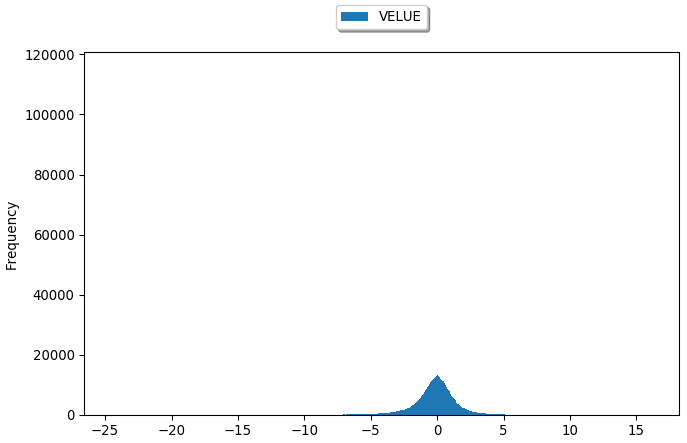

In [25]:
display(proteamoesValueNOTNormalized)

In [4]:
data_df_3 = spark.read.jdbc(properties_dcfad1aea99e49d0abc14ecf6afa82b4['jdbcurl'], table='DASH13540.BREASTCABCERPATIENTVIEW', properties=properties_dcfad1aea99e49d0abc14ecf6afa82b4)
data_df_3.head()

Row(PATIENT_ID='TCGA-A2-A0T2            ', DIAGNOSYS='T3-M1-Stage IV')

In [5]:
pandaPatient=data_df_3.toPandas()
pandaPatient.describe()

,PATIENT_ID,DIAGNOSYS
count,108,108
unique,108,19
top,TCGA-AO-A12D,T2-M0-Stage IIA
freq,1,27


In [6]:
data_df_3.createOrReplaceTempView("patients")

In [7]:
data_df_2.createOrReplaceTempView("genomedata")

Analysis of STD Deviation of distribution of proteomes valu. The idea is to select only genes that:
1> present a "large" variation between patients
2> inside those exclude those that vary much also in healty patient (also if i have only 3 of them)

In [8]:
sqlDF_nonHealty = spark.sql("SELECT x.GENE, stddev(x.VELUE) as STD from GENOMEDATA as x where x.PATIENT_ID NOT LIKE('%HEALTY%') group by x.GENE")
sqlDF_nonHealty.show()

+--------------------+------------------+
|                GENE|               STD|
+--------------------+------------------+
|NP_001243549-# (R...|1.2871092765733598|
|NP_004841-ROCK2 (...|0.8806026185402048|
|NP_037517-CYTH4 (...| 1.044822240990398|
|NP_006694-NUDT3 (...|0.8108056182614517|
|NP_065706-JPH3 (j...|2.5328742285393075|
|NP_004381-CTSH (p...|1.4419925503557436|
|NP_115898-MAK16 (...|0.8487512874079434|
|NP_872634-SRPK2 (...|0.9327193060008665|
|NP_001072-CUBN (c...|1.3961624573214146|
|NP_705718-CAMK1D ...|1.0928795066506742|
|NP_077306-SLC27A3...|1.3895287951614965|
|NP_001014765-FBXO...|1.6207962468391683|
|NP_003792-GPAA1 (...| 1.260182564615703|
|NP_001073948-# (r...|1.8440122394594924|
|NP_683720-PSMB8 (...|1.1059385155475951|
|XP_001718697-# (P...|2.2927844802770485|
|NP_001186763-# (v...| 2.208720744715005|
|NP_006342-TIMM44 ...| 0.876454997190699|
|NP_000167-NR3C1 (...| 1.212622201274764|
|NP_002573-PARN (p...|0.8856064287353005|
+--------------------+------------

In [9]:
std_df=sqlDF_nonHealty.toPandas()


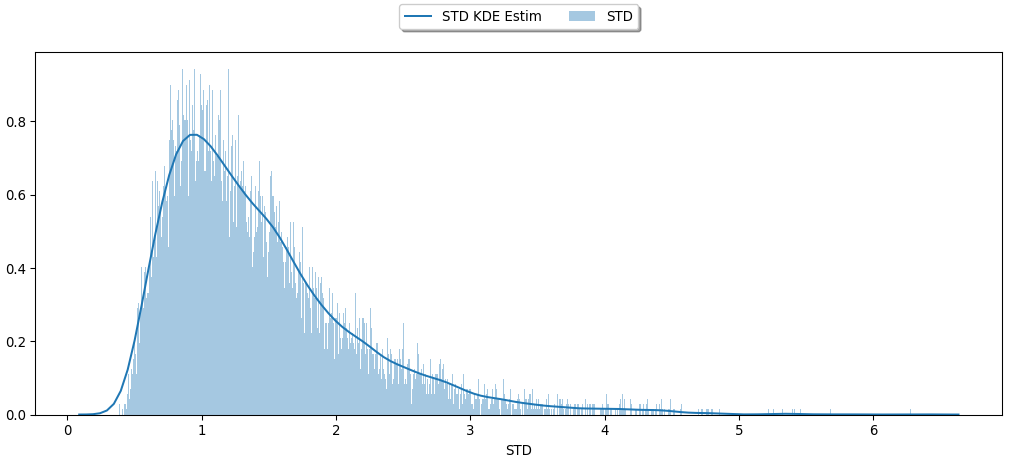

In [10]:
display(std_df)

In [11]:
sqlDF_Healty = spark.sql("SELECT x.GENE, stddev(x.VELUE) as STD from GENOMEDATA as x where x.PATIENT_ID LIKE('%HEALTY%') group by x.GENE")
sqlDF_Healty.show()

+--------------------+-------------------+
|                GENE|                STD|
+--------------------+-------------------+
|NP_001138535-GATS...| 0.9257716096316154|
|NP_997191-NUP210L...| 0.6950291130882984|
|NP_055787-TCF25 (...|0.37680002760565606|
|NP_075568-C8ORF33...|   1.26464540619281|
|NP_064554-LXN (la...| 1.1610978657704025|
|NP_057302-POLK (D...| 0.3781039897048108|
|NP_068590-SAV1 (p...| 2.0391641984822626|
|NP_001186763-# (v...| 0.9161581907826123|
|NP_059980-TMED9 (...| 1.1438814847567331|
|NP_002573-PARN (p...| 0.2189498677126958|
|NP_006234-PPP2R5A...| 0.3586710851502898|
|NP_037517-CYTH4 (...|                0.0|
|NP_982272-DOCK8 (...| 0.3606755977964649|
|NP_001014765-FBXO...| 0.2882441693631593|
|NP_003792-GPAA1 (...|0.20345040493951796|
|NP_001093136-PTAR...|0.29698399908131756|
|NP_065706-JPH3 (j...|                0.0|
|NP_054778-C13ORF1...|  2.203382569548641|
|NP_001838-COL4A6 ...|  1.344192761076642|
|NP_001034976-# (u...|                0.0|
+----------

In [12]:
std_df1=sqlDF_Healty.toPandas()

In [22]:
display(std_df1)

##  CONCLUSION: seems that GENE with protheomes distribution with STD > 2,9 are peculiar of not healty patients. Let see their number and caracteristics.

In [14]:
sqlDF_InterestingGENE = spark.sql("SELECT DISTINCT x.GENE from GENOMEDATA as x where ((SELECT stddev(k.VELUE) as STD from GENOMEDATA as k where k.GENE=x.GENE group by k.GENE)> 2.9) AND (x.PATIENT_ID NOT LIKE('%HEALTY%'))")
sqlDF_InterestingGENE.show()

+--------------------+
|                GENE|
+--------------------+
|NP_001838-COL4A6 ...|
|NP_751897-MSH5 (m...|
|NP_001128504-FAM1...|
|NP_002668-PMP2 (m...|
|NP_005098-EXOG (n...|
|NP_113663-ESPN (e...|
|NP_937790-ABHD15 ...|
|NP_000921-PLAT (t...|
|NP_001017989-OPA3...|
|NP_001127948-LRRC...|
|NP_001231684-# (C...|
|NP_004481-GRB14 (...|
|NP_036469-CCDC19 ...|
|NP_872308-TMPRSS1...|
|NP_000175-HBG2 (h...|
|NP_001265536-# (f...|
|NP_001862-CPB1 (c...|
|NP_060636-FAM176B...|
|NP_001030024-SMOC...|
|NP_597717-ZNF418 ...|
+--------------------+
only showing top 20 rows



In [15]:
sqlDF_InterestingGENE.count()

576

In [16]:
interestingGenePandas=sqlDF_InterestingGENE.toPandas()
interestingGenePandas.describe()

,GENE
count,576
unique,576
top,NP_054858-SCN11A (sodium channel protein type ...
freq,1


### So we restrict ML modeling to 576 Gene with high STD and not presente in Healty and on all patients.

In [17]:
#creation of other temp view with interesting gene patient
sqlDF_InterestingGENE.createOrReplaceTempView("interestingGenePatient")

#### Creation of final data frame with normalized data ONLY for interesting gene/patient

In [18]:
sqlDF1F = spark.sql("SELECT x.GENE, x.PATIENT_ID , (x.VELUE - (select avg(y.VELUE) from GENOMEDATA as Y where y.GENE = x.GENE group by y.GENE))/(select stddev(k.VELUE) from GENOMEDATA as k where  k.GENE = x.GENE group by k.GENE) as NORMVALUE from GENOMEDATA as x where EXISTS(SELECT 1 FROM interestingGenePatient as h where h.GENE= x.GENE)")
sqlDF1F.show()

+--------------------+--------------------+--------------------+
|                GENE|          PATIENT_ID|           NORMVALUE|
+--------------------+--------------------+--------------------+
|NP_001838-COL4A6 ...|TCGA-A2-A0CM     ...| 0.21067102480508565|
|NP_001838-COL4A6 ...|TCGA-AN-A0FL     ...|-0.09673723282260555|
|NP_001838-COL4A6 ...|TCGA-A7-A13F     ...|  0.6475203414227848|
|NP_001838-COL4A6 ...|TCGA-A2-A0EX     ...|-0.01585510431030...|
|NP_001838-COL4A6 ...|TCGA-C8-A12U     ...|  0.1982620912299216|
|NP_001838-COL4A6 ...|TCGA-A2-A0SW     ...|  0.2662924211602008|
|NP_001838-COL4A6 ...|TCGA-AN-A0FK     ...|   1.120352924477023|
|NP_001838-COL4A6 ...|TCGA-AO-A0JJ     ...|  1.2762481891806152|
|NP_001838-COL4A6 ...|TCGA-A8-A079     ...| -0.3527996477999882|
|NP_001838-COL4A6 ...|TCGA-BH-A0DG     ...|  0.5294607720797679|
|NP_001838-COL4A6 ...|TCGA-A2-A0T6     ...| -1.3172415114045448|
|NP_001838-COL4A6 ...|TCGA-A8-A06Z     ...|-0.42142583749570117|
|NP_001838-COL4A6 ...|TCG

In [19]:
sqlDF1FPandas= sqlDF1F.toPandas()
sqlDF1FPandas.describe()

,NORMVALUE
count,4.435200e+04
mean,-5.532091e-18
std,9.934965e-01
min,-7.175991e+00
25%,-6.178475e-01
50%,1.508999e-01
75%,5.720454e-01
max,4.832523e+00



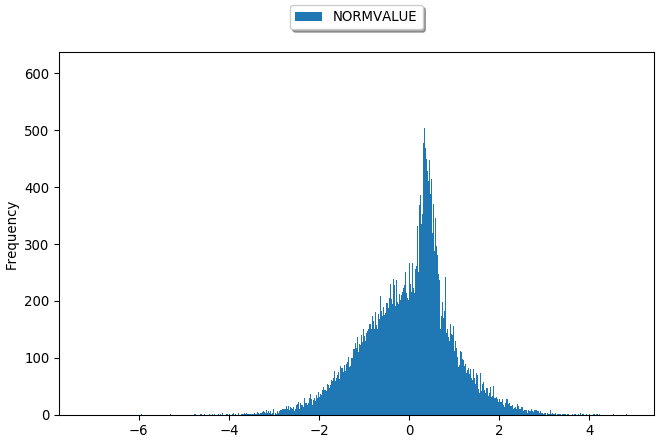

In [21]:
display(sqlDF1FPandas)

In [20]:
#creation of other temp view with interesting gene patient AND normalized data
sqlDF1F.createOrReplaceTempView("norm_int_genePatient")

In [21]:
#Join interesting normalized data with patient data via patient code
sqlDF_final = spark.sql("SELECT TRIM(TRANSLATE(x.GENE,',',' ')) as GENE_PROTEOMES, x.PATIENT_ID, x.NORMVALUE FROM norm_int_genePatient as x")
sqlDF_final.show()

+--------------------+--------------------+--------------------+
|      GENE_PROTEOMES|          PATIENT_ID|           NORMVALUE|
+--------------------+--------------------+--------------------+
|NP_001838-COL4A6 ...|TCGA-A2-A0CM     ...| 0.21067102480508565|
|NP_001838-COL4A6 ...|TCGA-AN-A0FL     ...|-0.09673723282260555|
|NP_001838-COL4A6 ...|TCGA-A2-A0EX     ...|-0.01585510431030...|
|NP_001838-COL4A6 ...|TCGA-A7-A13F     ...|  0.6475203414227848|
|NP_001838-COL4A6 ...|TCGA-C8-A12U     ...|  0.1982620912299216|
|NP_001838-COL4A6 ...|TCGA-A2-A0SW     ...|  0.2662924211602008|
|NP_001838-COL4A6 ...|TCGA-AN-A0FK     ...|   1.120352924477023|
|NP_001838-COL4A6 ...|TCGA-AO-A0JJ     ...|  1.2762481891806152|
|NP_001838-COL4A6 ...|TCGA-A8-A079     ...| -0.3527996477999882|
|NP_001838-COL4A6 ...|TCGA-BH-A0DG     ...|  0.5294607720797679|
|NP_001838-COL4A6 ...|TCGA-A2-A0T6     ...| -1.3172415114045448|
|NP_001838-COL4A6 ...|TCGA-A8-A06Z     ...|-0.42142583749570117|
|NP_001838-COL4A6 ...|TCG

In [22]:
dataPandaFinal=sqlDF_final.toPandas()

In [23]:
#verify what separator to use in out CSV to avoid further db load problem
coma_count=dataPandaFinal['GENE_PROTEOMES'].str.contains(',').sum()
print (coma_count)

0


In [24]:
outCSVFinal=dataPandaFinal.pivot(index='PATIENT_ID', columns='GENE_PROTEOMES')['NORMVALUE']
outCSVFinal.head(20)

GENE_PROTEOMES,NP_000058-CA2 (carbonic anhydrase 2),NP_000062-CBS (cystathionine beta-synthase),NP_000082-COL4A3 (collagen alpha-3(IV) chain precursor),NP_000086-COMP (cartilage oligomeric matrix protein precursor),NP_000161-GLDC (glycine dehydrogenase),NP_000175-HBG2 (hemoglobin subunit gamma-2),NP_000178-HGD (homogentisate 1 2-dioxygenase),NP_000291-PLA2G2A (phospholipase A2 membrane associated precursor),NP_000325-SCN4A (sodium channel protein type 4 subunit alpha),NP_000329-SLC12A1 (solute carrier family 12 member 1 isoform A),...,XP_003960567-# (PREDICTED: LOW QUALITY PROTEIN: mucin-19 partial),XP_003960579-# (PREDICTED: peptidyl-prolyl cis-trans isomerase A-like),XP_003960637-# (PREDICTED: LOW QUALITY PROTEIN: golgin A6 family-like 3),XP_003960780-# (PREDICTED: c-Jun-amino-terminal kinase-interacting protein 1-like),XP_003960812-# (PREDICTED: LOW QUALITY PROTEIN: zinc finger protein 100),XP_003960877-# (PREDICTED: uncharacterized protein CXorf49-like),XP_003960891-# (PREDICTED: mucin-16-like),XP_003960896-# (PREDICTED: mucin-5AC partial),XP_003960903-# (PREDICTED: aldo-keto reductase family 1 member C2-like isoform 3),XP_003960982-# (PREDICTED: coiled-coil domain-containing protein 146 isoform 1)
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A2-A0CM,-1.341993,0.542481,0.368585,1.096149,0.447724,-1.607328,-1.068796,-0.386600,0.771024,-0.397326,...,0.708694,0.389163,0.362077,-1.568644,0.257971,1.954673,1.039668,-0.985674,-0.714584,-0.051967
TCGA-A2-A0D2,-0.012394,1.322997,-0.041647,-1.164896,-0.894741,-0.103029,-1.254138,-0.422143,0.788794,0.669651,...,-1.605511,-0.375074,-1.066245,0.094268,-0.906290,0.638013,-0.492177,-1.141208,0.132024,-0.568283
TCGA-A2-A0EQ,-0.264556,0.571117,0.103513,-2.329454,-1.151081,-1.156694,-1.222069,0.314338,-1.781279,0.669651,...,-0.185596,-0.277354,0.018643,-1.392204,1.152243,-0.963629,-1.861517,-1.220047,-1.001139,0.292930
TCGA-A2-A0EV,0.653911,-0.103693,-2.761479,1.242371,-0.610467,0.650799,0.686469,0.466287,-2.839108,-1.293676,...,0.291357,-1.701148,-2.279698,0.369530,-2.035257,0.638013,0.314911,0.525666,1.266839,-2.064887
TCGA-A2-A0EX,2.185264,-0.508115,-0.402799,1.557300,-1.172924,0.414673,-1.128713,-0.459307,0.583516,0.669651,...,0.489962,0.711099,-2.129698,0.369530,0.223954,-0.631303,0.314911,-1.002352,-0.925408,-0.556606
TCGA-A2-A0EY,-0.682178,0.087661,1.443385,1.422753,1.181728,0.422792,2.330258,1.003961,-0.790534,-0.014595,...,1.270647,0.814562,0.498639,-0.156315,0.928853,-0.738611,0.031301,1.496748,0.783519,2.703454
TCGA-A2-A0SW,-0.239827,-1.020985,0.345730,0.976932,0.221565,0.675086,1.450348,1.486582,0.788794,0.689405,...,0.291357,0.565691,0.498639,0.487725,0.398688,0.638013,-0.540321,0.254935,1.606321,0.425193
TCGA-A2-A0SX,0.769616,-0.210513,0.417050,-0.111562,0.101606,1.942099,-0.075772,1.236323,0.788794,-0.674919,...,0.291357,0.054628,0.498639,1.493843,0.398688,0.638013,0.314911,-0.482412,1.183303,0.995709
TCGA-A2-A0T3,0.405019,-1.555149,-0.438963,-0.170250,-0.127122,0.205155,-0.617755,-1.750054,-1.485027,-1.154918,...,-0.214361,-0.300648,-2.420942,1.017986,-1.269686,-0.509198,-1.057284,-0.372570,-0.450508,-1.693025


In [25]:
outCSVFinal.columns.name = None               #remove categories
outCSVFinal = outCSVFinal.reset_index()  
outCSVFinal.head()

,PATIENT_ID,NP_000058-CA2 (carbonic anhydrase 2),NP_000062-CBS (cystathionine beta-synthase),NP_000082-COL4A3 (collagen alpha-3(IV) chain precursor),NP_000086-COMP (cartilage oligomeric matrix protein precursor),NP_000161-GLDC (glycine dehydrogenase),NP_000175-HBG2 (hemoglobin subunit gamma-2),NP_000178-HGD (homogentisate 1 2-dioxygenase),NP_000291-PLA2G2A (phospholipase A2 membrane associated precursor),NP_000325-SCN4A (sodium channel protein type 4 subunit alpha),...,XP_003960567-# (PREDICTED: LOW QUALITY PROTEIN: mucin-19 partial),XP_003960579-# (PREDICTED: peptidyl-prolyl cis-trans isomerase A-like),XP_003960637-# (PREDICTED: LOW QUALITY PROTEIN: golgin A6 family-like 3),XP_003960780-# (PREDICTED: c-Jun-amino-terminal kinase-interacting protein 1-like),XP_003960812-# (PREDICTED: LOW QUALITY PROTEIN: zinc finger protein 100),XP_003960877-# (PREDICTED: uncharacterized protein CXorf49-like),XP_003960891-# (PREDICTED: mucin-16-like),XP_003960896-# (PREDICTED: mucin-5AC partial),XP_003960903-# (PREDICTED: aldo-keto reductase family 1 member C2-like isoform 3),XP_003960982-# (PREDICTED: coiled-coil domain-containing protein 146 isoform 1)
0,TCGA-A2-A0CM,-1.341993,0.542481,0.368585,1.096149,0.447724,-1.607328,-1.068796,-0.386600,0.771024,...,0.708694,0.389163,0.362077,-1.568644,0.257971,1.954673,1.039668,-0.985674,-0.714584,-0.051967
1,TCGA-A2-A0D2,-0.012394,1.322997,-0.041647,-1.164896,-0.894741,-0.103029,-1.254138,-0.422143,0.788794,...,-1.605511,-0.375074,-1.066245,0.094268,-0.906290,0.638013,-0.492177,-1.141208,0.132024,-0.568283
2,TCGA-A2-A0EQ,-0.264556,0.571117,0.103513,-2.329454,-1.151081,-1.156694,-1.222069,0.314338,-1.781279,...,-0.185596,-0.277354,0.018643,-1.392204,1.152243,-0.963629,-1.861517,-1.220047,-1.001139,0.292930
3,TCGA-A2-A0EV,0.653911,-0.103693,-2.761479,1.242371,-0.610467,0.650799,0.686469,0.466287,-2.839108,...,0.291357,-1.701148,-2.279698,0.369530,-2.035257,0.638013,0.314911,0.525666,1.266839,-2.064887
4,TCGA-A2-A0EX,2.185264,-0.508115,-0.402799,1.557300,-1.172924,0.414673,-1.128713,-0.459307,0.583516,...,0.489962,0.711099,-2.129698,0.369530,0.223954,-0.631303,0.314911,-1.002352,-0.925408,-0.556606


In [26]:
project.save_data(data=outCSVFinal.to_csv(index=False, sep=',', encoding='utf-8'),file_name='PIVOT_ByPatient_ID.csv',overwrite=True)

{'asset_id': '8af015c3-b0b3-4a1c-9388-7beeba6d7168',
 'bucket_name': 'breastcancerproteomes-donotdelete-pr-zmcmbnmwpo1wza',
 'file_name': 'PIVOT_ByPatient_ID.csv',
 'message': 'File PIVOT_ByPatient_ID.csv has been written successfully to the associated OS'}

In [27]:
# The code was removed by Watson Studio for sharing.

In [28]:
df_PIVOT_PatientID.createOrReplaceTempView("pvt_pat_id")

In [29]:
sqlDF_final_diag = spark.sql("SELECT y.DIAGNOSYS, x.* FROM pvt_pat_id as x, patients as y where x.patient_id = y.patient_id")
#sqlDF_final_diag.show()

In [30]:
dataPandaFinal_diag=sqlDF_final_diag.toPandas()
dataPandaFinal_diag.head()

,DIAGNOSYS,PATIENT_ID,NP_000058-CA2 (carbonic anhydrase 2),NP_000062-CBS (cystathionine beta-synthase),NP_000082-COL4A3 (collagen alpha-3(IV) chain precursor),NP_000086-COMP (cartilage oligomeric matrix protein precursor),NP_000161-GLDC (glycine dehydrogenase),NP_000175-HBG2 (hemoglobin subunit gamma-2),NP_000178-HGD (homogentisate 1 2-dioxygenase),NP_000291-PLA2G2A (phospholipase A2 membrane associated precursor),...,XP_003960567-# (PREDICTED: LOW QUALITY PROTEIN: mucin-19 partial),XP_003960579-# (PREDICTED: peptidyl-prolyl cis-trans isomerase A-like),XP_003960637-# (PREDICTED: LOW QUALITY PROTEIN: golgin A6 family-like 3),XP_003960780-# (PREDICTED: c-Jun-amino-terminal kinase-interacting protein 1-like),XP_003960812-# (PREDICTED: LOW QUALITY PROTEIN: zinc finger protein 100),XP_003960877-# (PREDICTED: uncharacterized protein CXorf49-like),XP_003960891-# (PREDICTED: mucin-16-like),XP_003960896-# (PREDICTED: mucin-5AC partial),XP_003960903-# (PREDICTED: aldo-keto reductase family 1 member C2-like isoform 3),XP_003960982-# (PREDICTED: coiled-coil domain-containing protein 146 isoform 1)
0,T2-M0-Stage IIA,TCGA-A2-A0CM,-1.3419934200884827,0.5424810492092365,0.36858505532286845,1.0961486428020586,0.4477244211757135,-1.6073284142327056,-1.0687964138097423,-0.3866002328737398,...,0.7086941999686238,0.389163233155793,0.3620769603399991,-1.5686441135088904,0.25797102931328825,1.9546733309534663,1.039668430930183,-0.985673863827498,-0.7145835179308925,-0.051966827656767876
1,T2-M0-Stage IIB,TCGA-BH-A18Q,-0.9734354374952624,2.1297603512862775,-2.48635680801348,-1.1158370597660425,0.7596184466468536,-0.005212085094430997,-0.5837161510614838,-1.028269102608502,...,-2.0011980407262415,-2.2387927995652865,-1.0186370741506854,-0.5154297257145936,-1.7800539908005732,-1.143322338516443,1.4640071929331815,-1.5633270749833545,-0.8612375339702175,0.22832504366047696
2,T2-M0-Stage IIA,TCGA-A7-A0CE,-0.5636311615846604,1.4512948551731673,-0.20543153714015652,-0.8069375815060709,1.7071257676823512,-0.681700766516948,-0.8707789591961989,2.4572765898576767,...,0.29135746985296257,0.6808883314457168,0.49863922180519255,-0.6212884068309676,0.5176290555568646,0.6380128856733857,1.5758346130787435,-1.2406186557518382,-0.20939574647842887,-0.5257823202397282
3,T3-M0-Stage IIB,TCGA-D8-A142,-0.23506285223677967,1.7664659598670787,-2.7766398088305624,0.6593928681966246,-0.7057965282294005,0.4138193245166193,-0.15460873334775138,2.1317546498565254,...,0.29135746985296257,-1.190570717911386,-2.1596493682496103,0.36952952677993844,-1.0284480844137696,0.6380128856733857,0.3149113620262534,0.5256664812960566,1.5503944548532052,-1.0772722476067396
4,T2-M0-Stage IIA,TCGA-AO-A0J6,0.5422880940840934,0.015432338973829488,1.2628996563730344,0.9488819507136106,0.64149446905026,0.8359985086124441,0.1283701667030043,2.1825784582599423,...,0.8225853892229164,-0.1037558082503774,0.3132344759177971,1.5569041441365263,-0.6063788243486977,0.6380128856733857,-0.3001696940757962,-0.40754854825413195,1.881246066847299,0.7857142307686987


In [31]:
dataPandaFinal_diag.describe()

,DIAGNOSYS,PATIENT_ID,NP_000058-CA2 (carbonic anhydrase 2),NP_000062-CBS (cystathionine beta-synthase),NP_000082-COL4A3 (collagen alpha-3(IV) chain precursor),NP_000086-COMP (cartilage oligomeric matrix protein precursor),NP_000161-GLDC (glycine dehydrogenase),NP_000175-HBG2 (hemoglobin subunit gamma-2),NP_000178-HGD (homogentisate 1 2-dioxygenase),NP_000291-PLA2G2A (phospholipase A2 membrane associated precursor),...,XP_003960567-# (PREDICTED: LOW QUALITY PROTEIN: mucin-19 partial),XP_003960579-# (PREDICTED: peptidyl-prolyl cis-trans isomerase A-like),XP_003960637-# (PREDICTED: LOW QUALITY PROTEIN: golgin A6 family-like 3),XP_003960780-# (PREDICTED: c-Jun-amino-terminal kinase-interacting protein 1-like),XP_003960812-# (PREDICTED: LOW QUALITY PROTEIN: zinc finger protein 100),XP_003960877-# (PREDICTED: uncharacterized protein CXorf49-like),XP_003960891-# (PREDICTED: mucin-16-like),XP_003960896-# (PREDICTED: mucin-5AC partial),XP_003960903-# (PREDICTED: aldo-keto reductase family 1 member C2-like isoform 3),XP_003960982-# (PREDICTED: coiled-coil domain-containing protein 146 isoform 1)
count,77,77,77,77,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
unique,17,77,77,77,75,77,77,77,77,69,...,64,77,54,64,65,33,62,75,77,76
top,T2-M0-Stage IIA,TCGA-A2-A0YD,-0.26455638424791184,-0.6406401144500342,0.41705044347698106,0.3237974432253329,2.887242260332338,-1.3501116789610288,2.0067520166239348,0.31433770961419655,...,0.29135746985296257,0.6475872321962973,0.49863922180519255,0.36952952677993844,0.39868781346934107,0.6380128856733857,0.3149113620262534,0.5256664812960566,-0.28365658743918165,0.22832504366047696
freq,19,1,1,1,3,1,1,1,1,9,...,14,1,24,14,13,45,16,3,1,2


In [32]:
dataPandaFinal_diag.drop(columns=['PATIENT_ID'], inplace=True)
dataPandaFinal_diag.head()

,DIAGNOSYS,NP_000058-CA2 (carbonic anhydrase 2),NP_000062-CBS (cystathionine beta-synthase),NP_000082-COL4A3 (collagen alpha-3(IV) chain precursor),NP_000086-COMP (cartilage oligomeric matrix protein precursor),NP_000161-GLDC (glycine dehydrogenase),NP_000175-HBG2 (hemoglobin subunit gamma-2),NP_000178-HGD (homogentisate 1 2-dioxygenase),NP_000291-PLA2G2A (phospholipase A2 membrane associated precursor),NP_000325-SCN4A (sodium channel protein type 4 subunit alpha),...,XP_003960567-# (PREDICTED: LOW QUALITY PROTEIN: mucin-19 partial),XP_003960579-# (PREDICTED: peptidyl-prolyl cis-trans isomerase A-like),XP_003960637-# (PREDICTED: LOW QUALITY PROTEIN: golgin A6 family-like 3),XP_003960780-# (PREDICTED: c-Jun-amino-terminal kinase-interacting protein 1-like),XP_003960812-# (PREDICTED: LOW QUALITY PROTEIN: zinc finger protein 100),XP_003960877-# (PREDICTED: uncharacterized protein CXorf49-like),XP_003960891-# (PREDICTED: mucin-16-like),XP_003960896-# (PREDICTED: mucin-5AC partial),XP_003960903-# (PREDICTED: aldo-keto reductase family 1 member C2-like isoform 3),XP_003960982-# (PREDICTED: coiled-coil domain-containing protein 146 isoform 1)
0,T2-M0-Stage IIA,-1.3419934200884827,0.5424810492092365,0.36858505532286845,1.0961486428020586,0.4477244211757135,-1.6073284142327056,-1.0687964138097423,-0.3866002328737398,0.7710241584675954,...,0.7086941999686238,0.389163233155793,0.3620769603399991,-1.5686441135088904,0.25797102931328825,1.9546733309534663,1.039668430930183,-0.985673863827498,-0.7145835179308925,-0.051966827656767876
1,T2-M0-Stage IIB,-0.9734354374952624,2.1297603512862775,-2.48635680801348,-1.1158370597660425,0.7596184466468536,-0.005212085094430997,-0.5837161510614838,-1.028269102608502,-1.5381661357883454,...,-2.0011980407262415,-2.2387927995652865,-1.0186370741506854,-0.5154297257145936,-1.7800539908005732,-1.143322338516443,1.4640071929331815,-1.5633270749833545,-0.8612375339702175,0.22832504366047696
2,T2-M0-Stage IIA,-0.5636311615846604,1.4512948551731673,-0.20543153714015652,-0.8069375815060709,1.7071257676823512,-0.681700766516948,-0.8707789591961989,2.4572765898576767,-0.4178316602597064,...,0.29135746985296257,0.6808883314457168,0.49863922180519255,-0.6212884068309676,0.5176290555568646,0.6380128856733857,1.5758346130787435,-1.2406186557518382,-0.20939574647842887,-0.5257823202397282
3,T3-M0-Stage IIB,-0.23506285223677967,1.7664659598670787,-2.7766398088305624,0.6593928681966246,-0.7057965282294005,0.4138193245166193,-0.15460873334775138,2.1317546498565254,-1.4481143237608083,...,0.29135746985296257,-1.190570717911386,-2.1596493682496103,0.36952952677993844,-1.0284480844137696,0.6380128856733857,0.3149113620262534,0.5256664812960566,1.5503944548532052,-1.0772722476067396
4,T2-M0-Stage IIA,0.5422880940840934,0.015432338973829488,1.2628996563730344,0.9488819507136106,0.64149446905026,0.8359985086124441,0.1283701667030043,2.1825784582599423,-0.2720600680596546,...,0.8225853892229164,-0.1037558082503774,0.3132344759177971,1.5569041441365263,-0.6063788243486977,0.6380128856733857,-0.3001696940757962,-0.40754854825413195,1.881246066847299,0.7857142307686987


In [33]:
project.save_data(data=dataPandaFinal_diag.to_csv(index=False, sep=',', encoding='utf-8'),file_name='DataForML.csv',overwrite=True)

{'asset_id': 'dc5e0532-07df-4222-9caa-e2b52c7f313d',
 'bucket_name': 'breastcancerproteomes-donotdelete-pr-zmcmbnmwpo1wza',
 'file_name': 'DataForML.csv',
 'message': 'File DataForML.csv has been written successfully to the associated OS'}